In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

C:\Users\unknow\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('train.tsv', sep='\t')
test = pd.read_csv('test.tsv', sep='\t')
sample = pd.read_csv('sample_submit.csv', header=None)

In [3]:
train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,M,0.530,0.435,0.155,0.6990,0.2880,0.1595,0.205,10
1,3,F,0.710,0.565,0.195,1.8170,0.7850,0.4920,0.490,11
2,7,F,0.625,0.520,0.180,1.3540,0.4845,0.3510,0.375,11
3,12,M,0.375,0.280,0.095,0.2225,0.0875,0.0430,0.080,10
4,16,I,0.415,0.330,0.090,0.3595,0.1700,0.0810,0.090,6


In [4]:
train.shape

(2088, 10)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2088 non-null   int64  
 1   Sex             2088 non-null   object 
 2   Length          2088 non-null   float64
 3   Diameter        2088 non-null   float64
 4   Height          2088 non-null   float64
 5   Whole weight    2088 non-null   float64
 6   Shucked weight  2088 non-null   float64
 7   Viscera weight  2088 non-null   float64
 8   Shell weight    2088 non-null   float64
 9   Rings           2088 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 163.2+ KB


In [6]:
train.describe()

,id,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000
mean,2118.050766,0.521873,0.406557,0.139413,0.819116,0.355410,0.178227,0.237196,9.930077
std,1189.026152,0.121148,0.100285,0.044880,0.484888,0.218666,0.108274,0.139393,3.283578
min,0.000000,0.110000,0.090000,0.000000,0.008000,0.002500,0.002000,0.003000,2.000000
25%,1119.000000,0.450000,0.350000,0.115000,0.438875,0.184375,0.092000,0.130000,8.000000
50%,2142.500000,0.540000,0.420000,0.140000,0.791250,0.334000,0.168750,0.230250,9.000000
75%,3128.250000,0.610000,0.480000,0.165000,1.140125,0.497500,0.247500,0.325000,11.000000
max,4175.000000,0.780000,0.625000,1.130000,2.555000,1.245500,0.574500,1.005000,29.000000


In [7]:
train.isnull().any()

id                False
Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

In [8]:
# いったん相関関係チェック
train.corr()

,id,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
id,1.000000,-0.004100,-0.009028,-0.017492,-0.015228,-0.011111,-0.016193,-0.010669,-0.000955
Length,-0.004100,1.000000,0.986119,0.772889,0.927385,0.898868,0.903773,0.899846,0.565930
Diameter,-0.009028,0.986119,1.000000,0.778407,0.927894,0.895383,0.900561,0.906198,0.581200
Height,-0.017492,0.772889,0.778407,1.000000,0.766687,0.727685,0.748535,0.761374,0.516339
Whole weight,-0.015228,0.927385,0.927894,0.766687,1.000000,0.968401,0.965136,0.957241,0.546150
Shucked weight,-0.011111,0.898868,0.895383,0.727685,0.968401,1.000000,0.929653,0.882338,0.431183
Viscera weight,-0.016193,0.903773,0.900561,0.748535,0.965136,0.929653,1.000000,0.908622,0.508487
Shell weight,-0.010669,0.899846,0.906198,0.761374,0.957241,0.882338,0.908622,1.000000,0.629028
Rings,-0.000955,0.565930,0.581200,0.516339,0.546150,0.431183,0.508487,0.629028,1.000000


In [9]:
#sns.pairplot(data=train, hue='Rings', size=2)

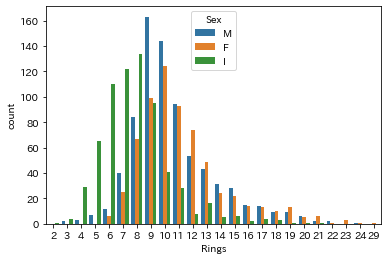

In [10]:
sns.countplot('Rings', data=train, hue='Sex')

(array([10.,  1.,  6.,  8.,  2.,  8.,  4.,  2.,  9.,  6.,  7.,  5.,  1.,
        19.,  2., 18.,  7.,  3.,  8.,  7., 12.,  2.,  4., 16.,  4., 14.,
         2.,  5., 15.,  9., 10.,  6.,  5., 18.,  8., 20.,  5.,  3., 20.,
         8., 12.,  6.,  4., 16.,  5., 18.,  4.,  3., 17.,  5., 16.,  4.,
         6., 13.,  4., 15.,  3.,  4., 19.,  4., 12.,  5.,  4., 19.,  9.,
        17.,  3.,  4., 12.,  3., 17., 11.,  6., 22.,  2., 22.,  5.,  5.,
        14.,  5., 17.,  7.,  6., 24.,  6., 21.,  6.,  9., 13.,  5., 24.,
         3.,  4., 19.,  2., 19.,  3.,  3., 11.,  4., 18.,  5.,  4., 20.,
         3., 17.,  5.,  8., 21.,  6., 19.,  3.,  5., 12.,  4., 23.,  9.,
        11., 25.,  3., 19.,  4.,  9., 19.,  9., 21.,  5.,  6., 20.,  4.,
        21.,  4.,  9., 22.,  6., 25.,  9.,  5., 11.,  3., 27.,  9.,  6.,
        11.,  6., 20.,  2.,  4., 21.,  3., 16.,  5.,  8., 17.,  1., 24.,
         5.,  3., 17.,  5., 12.,  1.,  1., 16.,  1., 19.,  4.,  3., 19.,
         5., 16.,  3.,  3., 12.,  6., 15.,  3.,  4.

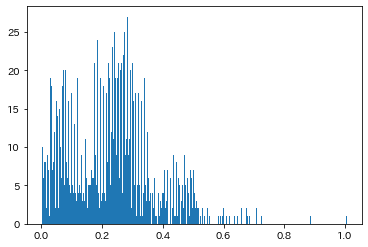

In [11]:
plt.hist(train['Shell weight'], bins=500)

In [12]:
train = train[train['Height'] < 0.4]
train = train[train['Shell weight'] < 0.8]


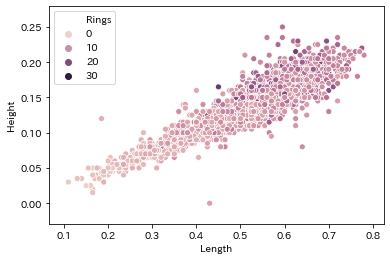

In [13]:
sns.scatterplot(x='Length', y='Height', data=train, hue='Rings')

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   3.,
          0.,   2.,   0.,   4.,   0.,   6.,   0.,   8.,   0.,  13.,   0.,
         12.,   0.,  11.,   0.,  21.,   0.,  23.,   0.,  37.,   0.,  33.,
          0.,  36.,   0.,  58.,   0.,  51.,   0.,  71.,   0.,  52.,   0.,
         70.,   0.,  63.,   0.,  85.,   0.,  99.,   0.,  98.,   0.,  84.,
          0., 115.,   0.,  99.,   0., 126.,   0., 110.,   0., 101.,   0.,
         97.,   0.,  80.,  99.,   0.,   0.,  64.,   0.,  56.,   0.,  48.,
          0.,  38.,   0.,  38.,  27.,   0.,   0.,  12.,   0.,  13.,   0.,
          6.,   0.,   5.,   0.,   3.,   3.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.    , 0.0025, 0.005 , 0.0075, 0.01  , 0.0125, 0.015 , 0.0175,
        0.02  , 0.0225, 0.025 , 0.0275, 0.03  , 0.0325, 0.035 , 0.0375,
        0.04  , 0.0425, 0.045 , 0.0475, 0.05  , 0.0525, 0.055 , 0.0575,
        0.06  , 0.0625, 0.065 , 0.0675, 0.07  , 0.0725, 0.075 , 0.0775,
        0.08  , 0.0825, 0.085 

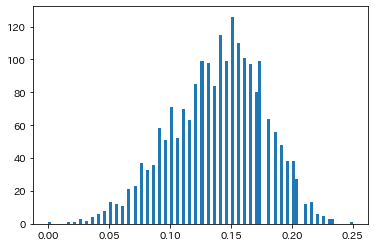

In [14]:
plt.hist(train['Height'], bins=100)

In [15]:
train = pd.get_dummies(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084 entries, 0 to 2087
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2084 non-null   int64  
 1   Length          2084 non-null   float64
 2   Diameter        2084 non-null   float64
 3   Height          2084 non-null   float64
 4   Whole weight    2084 non-null   float64
 5   Shucked weight  2084 non-null   float64
 6   Viscera weight  2084 non-null   float64
 7   Shell weight    2084 non-null   float64
 8   Rings           2084 non-null   int64  
 9   Sex_F           2084 non-null   uint8  
 10  Sex_I           2084 non-null   uint8  
 11  Sex_M           2084 non-null   uint8  
dtypes: float64(7), int64(2), uint8(3)
memory usage: 168.9 KB


In [16]:
#X = train.drop(['Rings'], axis=1)
X = train.drop(['id', 'Rings'], axis=1)
print(X.shape)
Y = train['Rings']

(2084, 10)


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084 entries, 0 to 2087
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          2084 non-null   float64
 1   Diameter        2084 non-null   float64
 2   Height          2084 non-null   float64
 3   Whole weight    2084 non-null   float64
 4   Shucked weight  2084 non-null   float64
 5   Viscera weight  2084 non-null   float64
 6   Shell weight    2084 non-null   float64
 7   Sex_F           2084 non-null   uint8  
 8   Sex_I           2084 non-null   uint8  
 9   Sex_M           2084 non-null   uint8  
dtypes: float64(7), uint8(3)
memory usage: 136.4 KB


In [18]:
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.530,0.435,0.155,0.6990,0.2880,0.1595,0.205,0,0,1
1,0.710,0.565,0.195,1.8170,0.7850,0.4920,0.490,1,0,0
2,0.625,0.520,0.180,1.3540,0.4845,0.3510,0.375,1,0,0
3,0.375,0.280,0.095,0.2225,0.0875,0.0430,0.080,0,0,1
4,0.415,0.330,0.090,0.3595,0.1700,0.0810,0.090,0,1,0


C:\Users\unknow\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\unknow\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\unknow\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\unknow\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


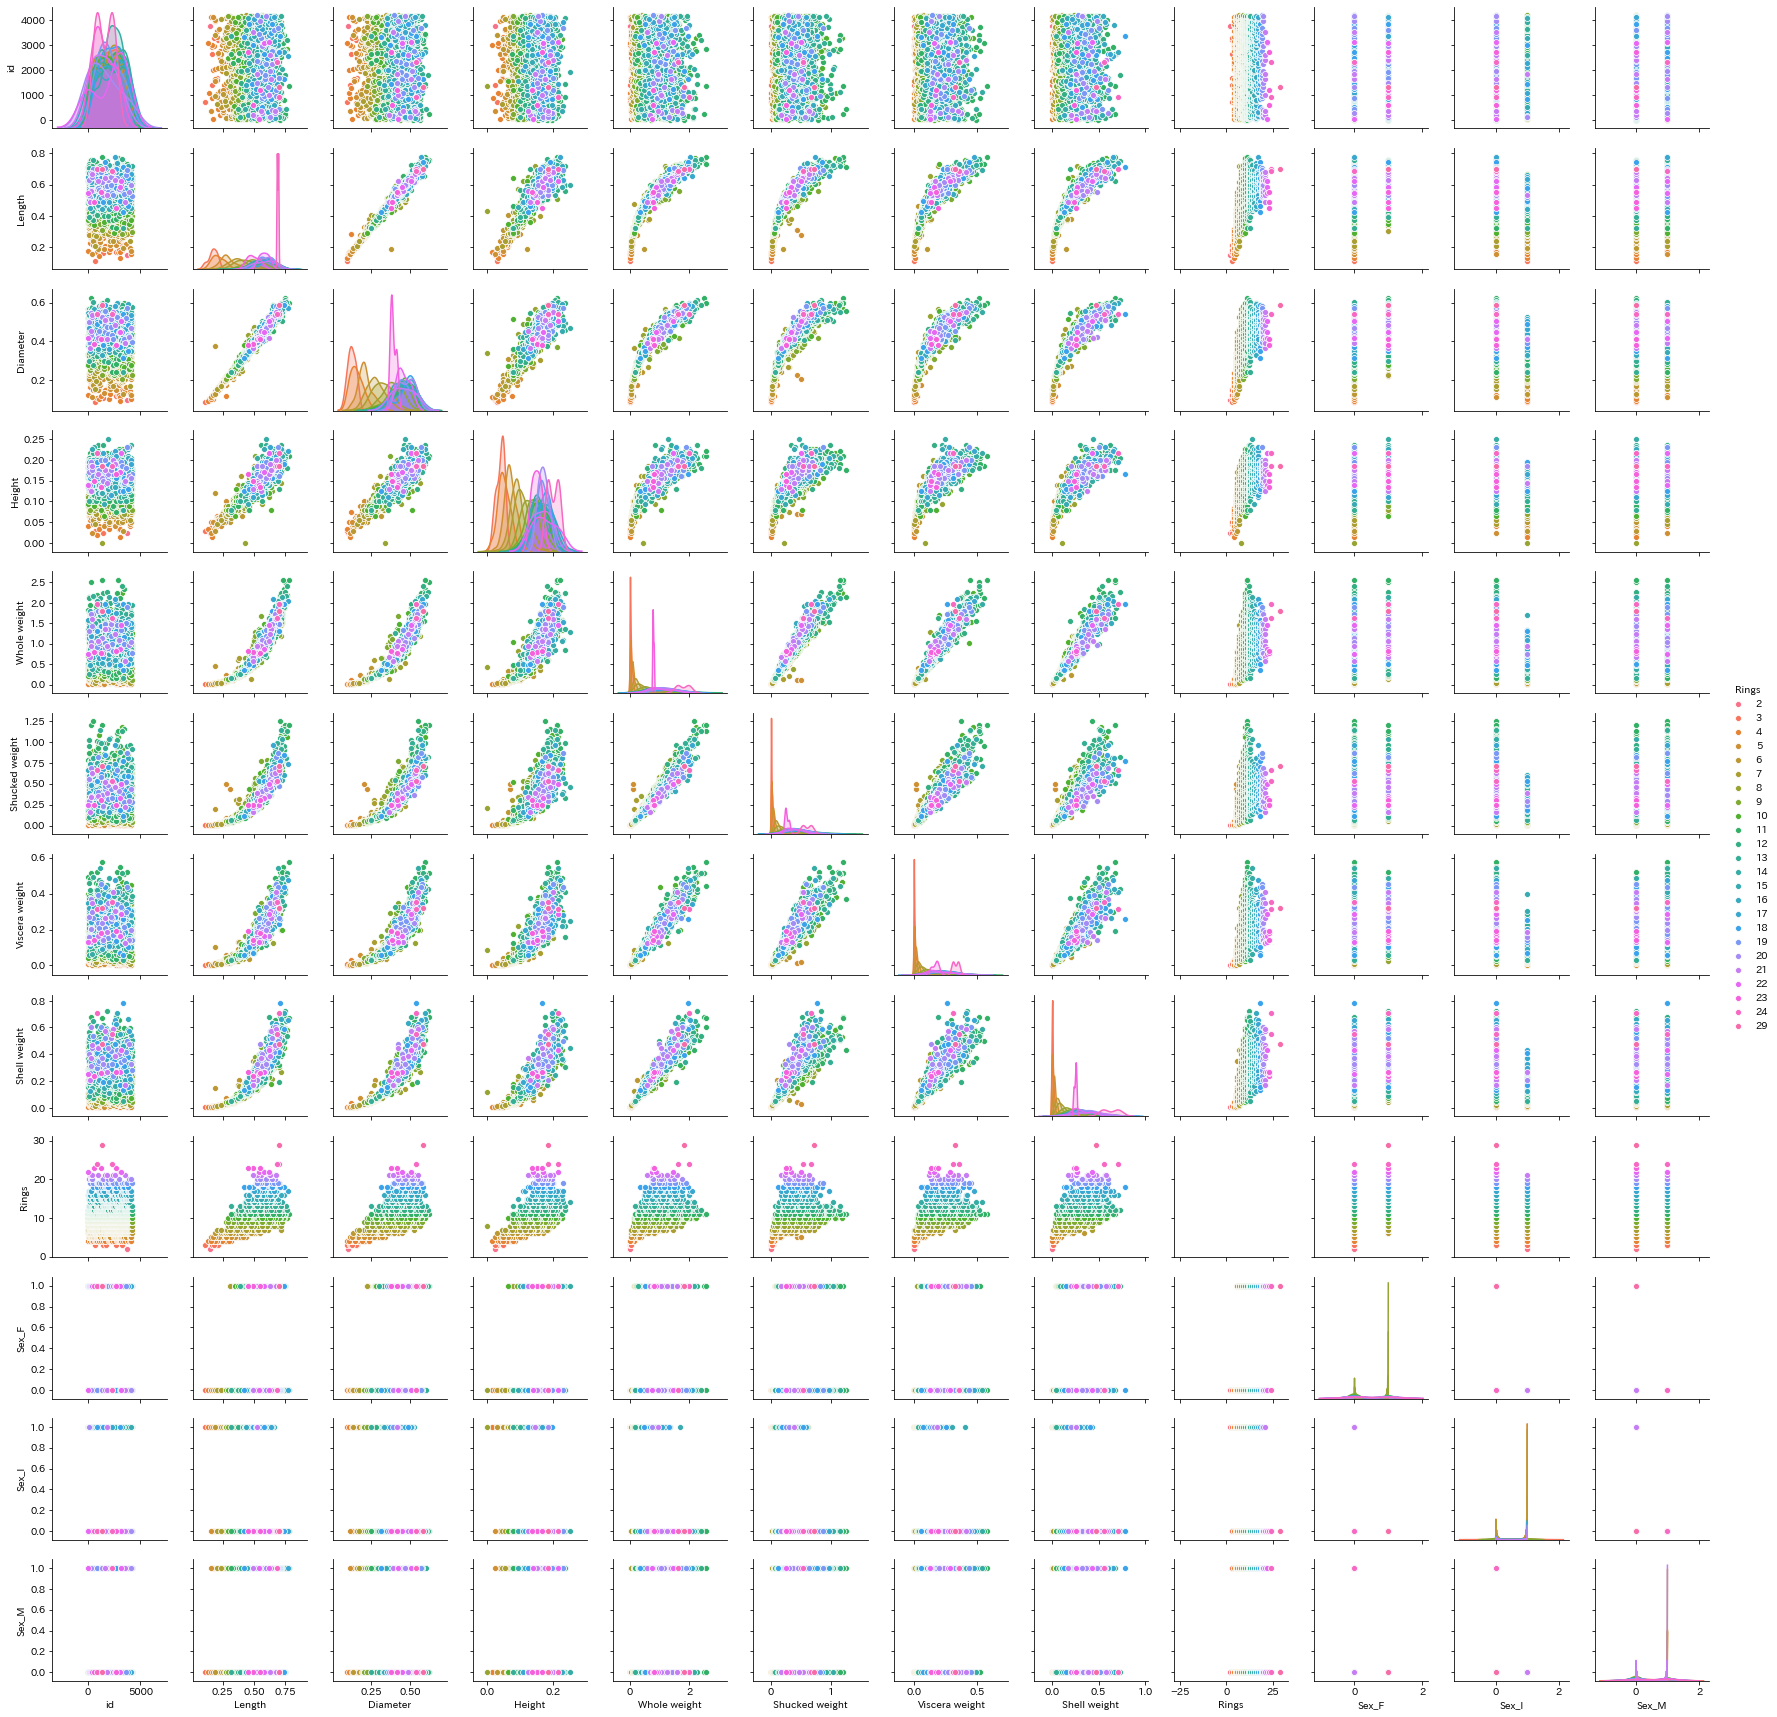

In [35]:
#sns.pairplot(train, hue='Rings', size=2)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=3)

In [21]:
# 重回帰分析

In [22]:
from sklearn.linear_model import LinearRegression as LR

In [23]:
model = LR()

In [24]:
model.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print('coef:', model.coef_)
print('intercept:', model.intercept_)

coef: [  0.05528903   9.58065829  19.36656276   7.06816077 -17.36291055
 -10.88292156  10.70444744   0.37596349  -0.58356688   0.20760339]
intercept: 3.1319213042727005


In [26]:
model.score(trainX, trainY)
# Height補正なし:0.5385322993690792
# Height補正あり:0.530806657341846

0.5288167291462426

In [27]:
pred = model.predict(testX)

In [28]:
# ロジスティック回帰分析

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log_model = LogisticRegression()

In [31]:
log_model.fit(trainX, trainY)

C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
log_model.score(trainX, trainY)

0.25857338820301784

In [33]:
print('coef:', log_model.coef_)
print('intercept:', log_model.intercept_)

coef: [[-1.36314996e+00 -1.05881563e+00 -3.65711077e-01 -1.50530136e+00
  -6.48579633e-01 -3.28522224e-01 -4.49879323e-01 -7.22841532e-01
  -1.11679533e+00 -9.34081756e-01]
 [-1.41865566e+00 -1.09701490e+00 -3.87706916e-01 -1.61198535e+00
  -6.93592476e-01 -3.50400260e-01 -4.84646708e-01 -7.34403847e-01
  -9.04943919e-01 -9.62343759e-01]
 [-2.60553882e+00 -2.05372754e+00 -6.86350825e-01 -3.28026338e+00
  -1.48983506e+00 -7.06446386e-01 -1.01185818e+00 -6.35884069e-01
   3.99140174e-01 -3.98103883e-01]
 [-1.79783307e+00 -1.44542574e+00 -5.24047065e-01 -3.62938573e+00
  -1.23012812e+00 -7.79823728e-01 -1.15685857e+00 -9.11169230e-01
   6.30239293e-01 -1.58972520e-01]
 [-2.98745396e-01 -2.62407147e-01  4.23189926e-03 -2.43813720e+00
  -8.13318039e-01 -7.39770257e-01 -9.21903198e-01 -7.43878425e-01
   4.04640393e-01 -5.73808849e-01]
 [ 1.06969494e+00  6.34716013e-01  1.97690890e-02 -2.24509728e+00
   2.81138532e-01 -5.32080812e-01 -1.53389713e+00 -9.28782776e-01
   1.59022431e-01 -4.107923